In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples = 1000, n_features = 2, n_classes = 2, n_clusters_per_class = 2, n_redundant= 0,random_state= 30)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.25)

<Axes: >

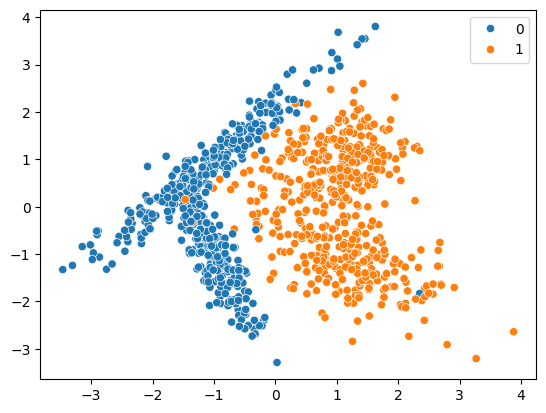

In [20]:
sns.scatterplot(x = X[:,0],y = X[:,1], hue = y)

### **Checking for the best kernel**

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
models = [SVC(kernel='rbf'), SVC(kernel='linear'), SVC(kernel='poly'), SVC(kernel='sigmoid')]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model)
    print(classification_report(y_test, y_pred))

SVC()
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       114
           1       1.00      0.95      0.97       136

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250

SVC(kernel='linear')
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       114
           1       0.95      0.92      0.93       136

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

SVC(kernel='poly')
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       114
           1       0.93      0.94      0.94       136

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93     

### **Hyperparameter Tuning**

In [25]:
from sklearn.model_selection import GridSearchCV

params_grid = {
  "C" : [0.1, 1, 5, 10,100,500 , 800, 1000],
  "kernel": ['rbf'],
  "gamma" : [1,0.1,0.01,0.001,0.0001]
}

In [26]:
grid = GridSearchCV(estimator = SVC(),
                    param_grid = params_grid,
                    cv = 5,
                    verbose = 3,
                    refit = True
                    )

In [27]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10, 100, 500, 800, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [29]:
y_pred = grid.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       114
           1       1.00      0.96      0.98       136

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[114   0]
 [  5 131]]


In [31]:
grid.best_params_

{'C': 500, 'gamma': 0.1, 'kernel': 'rbf'}